In [179]:
# @file        : soru1_b141210306_emre_bodur.ipynb
# @description : Python dili, "ScikitLearn" kütüphanesi ile Makine Öğrenmesi
# @course      : Pratikte BT Ve BS Uygulamaları
# @assignment  : 2. Proje Ödevi
# @date        : 24.05.2021
# @author      : Emre Bodur (B141210306)

In [180]:
# Proje ile ilgili kütüphaneler dahil ediliyor.
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import joblib

In [181]:
# iris dataseti yükleniyor
from sklearn.datasets import load_iris
irisData = load_iris()

In [182]:
# Projeye veri setinin dahil edilmesinden sonra bağımlı ve bağımsız değişkenleri oluşturmak için aşağıdaki kod satırını yazdım. 
# Böylece bağımsız nitelikleri X, bağımlı niteliği y değişkenine atadım.
X = irisData.data
y = irisData.target

In [183]:
# pandas modülü ile dataframe oluşturuluyor.
# iris dataseti içerisindeki ilk 5 kayıt gösteriliyor.
data_frame = pd.DataFrame(irisData.data, columns=irisData.feature_names)
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [184]:
# Veri seti içerisindeki verileri eğitim ve test veri setleri olarak ayırdım.
# Doğru sonuç almak için verinin % 75’i eğitim için, % 25’i ise test için ayrıldı.
# test_size değeri değiştirilerek farklı sonuçlar elde edilebilir.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [185]:
# BURAYA KADAR TÜM İŞLEMLER ALGORİTMADAN BAĞIMSIZ VE ORTAKTIR. 
# BU NOKTADAN SONRA SEÇİLEN ALGORİTMAYA GÖRE YORUM SATIRLARINI AÇIP KAPATARAK FARKLI DENEMELER GERÇEKLEŞTİRİLEBİLİR.

In [186]:
# GAUSSIAN NAIVE BAYES ALGORİTMASI ÖRNEĞİ

In [187]:
# Gaussian Naive Bayes algroritması ile model nesnesi oluşturuyorum. 
model = GaussianNB()

In [188]:
# Oluşturduğumuz modeli verilerimiz ile eğitelim.
model.fit(X_train, y_train)

GaussianNB()

In [189]:
# Modelimizi eğittik.
# Uygulamamızda kullanacağımız veri miktarı büyüdüğünde modeli eğitmek zaman alabilir.
# Veya başarı oranı her zaman yakalanmayabilir.
# Bu nedenle modeli birkez eğittikten sonra kaydederek kayıtlı modelden çalıştırmak faydalı olacaktır.
# Eğittiğimiz modeli dosyaya kaydedelim.
# Bunun için sklearn tarafından sunulan joblib modülünü kullacağız.
#joblib.dump(model, 'egitilmis_model_GaussianNB.joblib')

In [190]:
# Eğittiğimiz modeli dosyadan yükleyelim.
# Eğitilen bir modeli kullanacağımız için yukarıdaki model.fit(X_train, y_train) satırını comment satırı yapmalıyız.
#model = joblib.load('egitilmis_model_GaussianNB.joblib')

In [191]:
# Test Seti ile tahmin yaptım ayırdığım test setimi (X_test) kullanarak oluşturduğum model 
# ile tahmin yapalım ve elde ettiğimiz set (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım.
y_pred = model.predict(X_test)

In [192]:
# Eğer tek bir değeri tahmin ettirmek istiyorsak
# y_pred = model.predict([[5.8, 2.8, 5.1, 2.4]])

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [194]:
# Tahmin Sonuçlarını Test Sonuçları ile Karşılaştırma
# Hata matrisi (confusion matrix) kullanarak modelin başarısını ölçelim:
print('Karmaşıklık Matrisi:')
print(irisData.target_names)
print(confusion_matrix(y_test, y_pred))

# Karmaşıklık Matrisini Yorumlayalım
# 38 tane test kaydında Setosa sınıfına ait 13 tane kayıt varmış ve hepsi doğru tahmin edilmiş. 
# 16 tane versicolor varmış bunların tamamı doğru tahmin edilmiş. 
# 9 tane virginica varmış ve hepsi de başarıyla virginica olarak tahmin edilmiş.

Karmaşıklık Matrisi:
['setosa' 'versicolor' 'virginica']
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [195]:
# Başarı Oranı
# Bu örneğimizde modelimiz test_size = 0.25 ile GaussianNB algoritmasını kullanarak %100 oranında başarı ile çalıştı.
print ("Doğruluk (%) : ", 100*accuracy_score(y_test, y_pred))

Doğruluk (%) :  100.0


In [196]:
# Gerçek Değerlerin Öngörülen Değerlerle Karşılaştırılması
# Bu adımda, hem orijinal Test setinin (y_test) hem de tahmin edilen sonuçların (y_pred) 
# sınıflandırılmış değerlerini karşılaştırmak için bir Pandas DataFrame oluşturulur.
df = pd.DataFrame({'Gerçek Değerler':y_test, 'Tahmin Edilen Değerler':y_pred})
df

,Gerçek Değerler,Tahmin Edilen Değerler
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [197]:
# DECISION TREE CLASSIFIER ALGORİTMASI ÖRNEĞİ

In [198]:
# Karar ağacı algoritması ile bir model nesnesi tanımlayalım.
model = DecisionTreeClassifier()

In [199]:
# Oluşturduğumuz modeli verilerimiz ile eğitelim.
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [200]:
# Modelimizi eğittik.
# Uygulamamızda kullanacağımız veri miktarı büyüdüğünde modeli eğitmek zaman alabilir.
# Veya başarı oranı her zaman yakalanmayabilir.
# Bu nedenle modeli birkez eğittikten sonra kaydederek kayıtlı modelden çalıştırmak faydalı olacaktır.
# Eğittiğimiz modeli dosyaya kaydedelim.
# Bunun için sklearn tarafından sunulan joblib modülünü kullacağız.
#joblib.dump(model, 'egitilmis_model_DecisionTree.joblib')

In [201]:
# Eğittiğimiz modeli dosyadan yükleyelim.
# Eğitilen bir modeli kullanacağımı için yukarıdaki model.fit(X_train, y_train) satırını comment satırı yapmalıyız.
#model = joblib.load('egitilmis_model_DecisionTree.joblib')

In [202]:
# Test Seti ile tahmin yaptım ayırdığım test setimi (X_test) kullanarak oluşturduğum model 
# ile tahmin yapalım ve elde ettiğimiz set (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım.
y_pred = model.predict(X_test)

In [203]:
# Tahmin Sonuçlarını Test Sonuçları ile Karşılaştırma
# Hata matrisi (confusion matrix) kullanarak modelin başarısını ölçelim:
print('Karmaşıklık Matrisi:')
print(irisData.target_names)
print(confusion_matrix(y_test, y_pred))

# Karmaşıklık Matrisini Yorumlayalım
# 38 tane test kaydında Setosa sınıfına ait 13 tane kayıt varmış ve hepsi doğru tahmin edilmiş. 
# 16 tane versicolor varmış bunların 15 tanesini doğru 1 tanesini ise virginica olarak tahmin edilmiş. 
# 9 tane virginica varmış ve hepsi de başarıyla virginica olarak tahmin edilmiş.

Karmaşıklık Matrisi:
['setosa' 'versicolor' 'virginica']
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [204]:
# Başarı Oranı
# Bu örneğimizde modelimiz test_size = 0.25 ile DecisionTreeClassifier algoritmasını kullanarak %97 oranında başarı ile çalıştı.
print ("Doğruluk (%) : ", 100*accuracy_score(y_test, y_pred))

Doğruluk (%) :  97.36842105263158


In [205]:
# Gerçek Değerlerin Öngörülen Değerlerle Karşılaştırılması
# Bu adımda, hem orijinal Test setinin (y_test) hem de tahmin edilen sonuçların (y_pred) 
# sınıflandırılmış değerlerini karşılaştırmak için bir Pandas DataFrame oluşturulur.
#df = pd.DataFrame({'Gerçek Değerler':y_test, 'Tahmin Edilen Değerler':y_pred})
#df

In [206]:
# modeli görsel olarak incelemek için ağaç nesnei ile export ediyorum.
# dot uzantılı dosyayı Visual Studio Code ile açabiliriz.
# Ağacı görüntülemek için joaompinto.vscode-graphviz eklentisi yüklü olmalıdır.
tree.export_graphviz(
    model, 
    out_file = 'model_tree.dot', 
    label = 'all', 
    filled = True, 
    rounded = True)

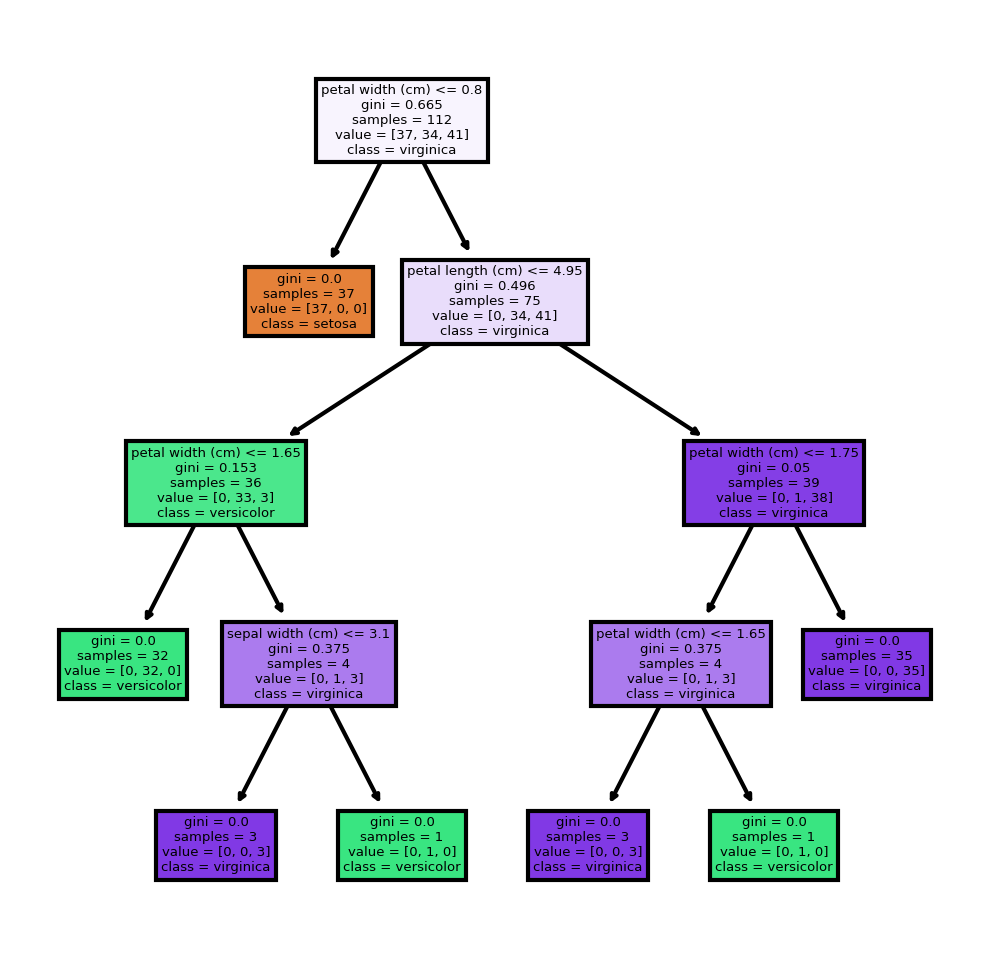

In [207]:
# modeli görsel olarak ekranda gösterelim ve resim olarak kaydedelim.
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);
fig.savefig('model_tree.png')